In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from Deneme.deneme import XLS as xls

import plotly as plot


Device: cpu
1.13.0


In [2]:
xlsClass = xls()


df = xlsClass.df
df.head()
new_data=(df.groupby(['BIRADS KATEGORİSİ', 'MEME KOMPOZİSYONU'])
.size()
.sort_values(ascending=False)
.reset_index(name='count')
)
new_data2=df.groupby(['BIRADS KATEGORİSİ', 'MEME KOMPOZİSYONU']).size().groupby(level=1).max()
group_data = df.groupby(['BIRADS KATEGORİSİ', 'MEME KOMPOZİSYONU'])['BIRADS KATEGORİSİ'].count()




indexes = group_data.index.values

birads = []
kompozisyon = []
count = group_data.values


for i in range (len(indexes)):

    birads.append(indexes[i][0])
    kompozisyon.append(indexes[i][1])
    


using_data = pd.DataFrame({"BIRADS KATEGORİSİ":birads,"MEME KOMPOZİSYONU":kompozisyon,"count":count})

using_data.head()


,BIRADS KATEGORİSİ,MEME KOMPOZİSYONU,count
0,0,A,100
1,0,B,221
2,0,C,220
3,0,D,193
4,1,A,349


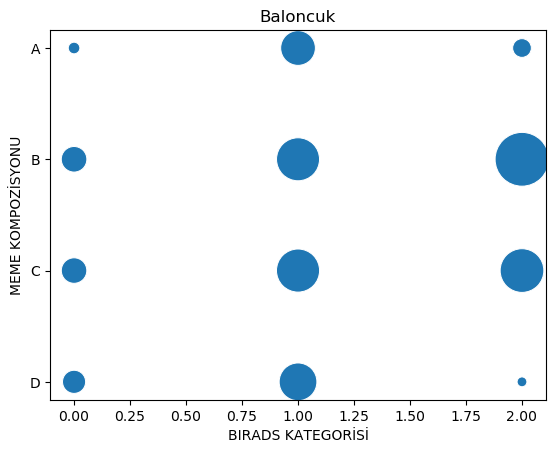

In [3]:
sns.scatterplot(data=using_data,x = "BIRADS KATEGORİSİ" ,y="MEME KOMPOZİSYONU",size="count",legend=False, sizes=(50, 1500)).set_title("Baloncuk")


plt.show()

In [4]:
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

import plotly.express as px

In [5]:

figure = px.scatter(using_data,
x = using_data["MEME KOMPOZİSYONU"],
y=using_data["BIRADS KATEGORİSİ"],
size=using_data["count"],
color="count",

size_max=60)

figure.show()

In [6]:
%pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [7]:
figure.write_image("deneme.png") 

In [8]:
kadran_df = df["KADRAN BİLGİSİ (SAĞ)"]

In [9]:
kadran_df

0           []
1           []
2          [4]
3          [0]
4           []
         ...  
3974        []
3975        []
3976        []
3977        []
3978    [1, 4]
Name: KADRAN BİLGİSİ (SAĞ), Length: 3979, dtype: object

In [1]:
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

path = "/home/alican/Documents/yoloV5/results_models/ConcatModel_2_4_23_40/ConcatModel.json"
def plot_acc(path:str):

    assert path.endswith(".json") , "You must enter json file path"
    
    dataframe = pd.read_json(path)
    train = dataframe["training"]
    test = dataframe["test"]
    train_list = list(train.iloc[0:])
    new_dict = train_list[0]
    train_acc= []
    val_acc = []
    for i in range(len(train_list)):
        buffer = train_list[i]
        try:
            valid_val = buffer["val"]
            train_val = buffer["train"]
        except KeyError:
            train_val = buffer["train"]
        for val in range(len(valid_val)):
            val_acc.append(valid_val[val]["acc"]*100)
        for train in range(len(train_val)):

            train_acc.append(train_val[train]["acc"]*100)
    

    

    plt.figure()
    plt.ylim(0,100)
    plt.yticks(np.arange(0,101,10))
    plt.xticks(np.arange(0,101,10))
    plt.plot(train_acc,label ='train accuracy')
    plt.plot(np.arange(0,100,5),val_acc,label ="validation accuracy")
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.title("Epoch bazlı başarı oranı grafiği")
    plt.legend()

plot_acc(path)  



ValueError: All arrays must be of the same length

In [2]:
import json
from jsonmerge import merge
def concatJson(path1:str,path2:str,wantedPath:str=None):


    with open(path1) as j1,open(path2) as j2:
        data1 = json.load(j1)
        data2 = json.load(j2)
    j1.close()
    j2.close()
    result = merge(data1,data2)
    splitted = path1.split("/")
    print(path1[:-5])
    if wantedPath is None:

        print(path1[-5])
        if path1[-6]=="c":
            name = path1[:-5] + "c" + ".json"
        else:
            name = path1[:-5] + "_c" +".json"
    else:         
        if path1[-6]=="c":
            name = wantedPath + "/" + splitted[-1][:-5] + "c" + ".json"
        else:
            name = wantedPath + "/" + splitted[-1][:-5] + "_c" +".json"

    with open(name,"w") as f:
        json.dump(result,f)
    
    f.close()
    
concatJson("/Users/okanegemen/Desktop/yoloV5/folder/metrics_Resnet50_c.json","/Users/okanegemen/Desktop/yoloV5/results_models/Resnet50_0121/metrics_Resnet50.json","/Users/okanegemen/Desktop/yoloV5/folder")





FileNotFoundError: [Errno 2] No such file or directory: '/Users/okanegemen/Desktop/yoloV5/folder/metrics_Resnet50_c.json'